# Assessing the New Zealand Top 100 baby names

## 1. Introduction
In this report, we have conducted an examination of a substantial dataset comprising baby names. This dataset encompasses girls' and boys' names spanning the years 1954 to 2018. The primary objective of this study was to derive intriguing insights from this dataset, particularly with regard to birth rates over the years and trends in baby names.

At the outset, our analysis revealed the emergence of certain names as highly popular among the population, followed by a gradual decline in their popularity over time. To obtain these insights, an exploration of various variables was undertaken.

Our investigation commenced with an examination of potential relationships among variables, such as the birth rate (number of births) of specific names per year. This exploration aimed to uncover the total number of births for males and females, as well as the birth ratio between the two genders. Furthermore, we sought to observe the declining trend in the popularity of names over the years.

This report will address the following key questions:

1: What is the birth rate in New Zealand spanning the years 1954 to 2018?

2: What are the temporal trends associated with the name 'Christine'? At what point did the name 'Christine' experience a decline in popularity?

3: What are the top three trending names for girls and boys in the year 2018?


## Importing Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
import re

### A) Importing data:
Below is a dataset extracted from "baby_names.csv" and save to a dataframe object.

In [ ]:
birth=pd.read_csv("baby_names.csv")

The analysis begins by determining how much data we have to work with.

In [ ]:
birth.shape

(13000, 4)

The dataset contains 13000 records with 4 columns including year, Name, No, and sex.

We will take a preliminary view of the dataset for assessing the data for exploration.

In [ ]:
birth.head(20)

,Name,No.,year,sex
0,Christine,779,1954,Female
1,Susan,735,1954,Female
2,Margaret,562,1954,Female
3,Judith,531,1954,Female
4,Jennifer,460,1954,Female
5,Mary,423,1954,Female
6,Elizabeth,419,1954,Female
7,Patricia,408,1954,Female
8,Linda,394,1954,Female
9,Barbara,382,1954,Female


In [ ]:
birth.tail(20)

,Name,No.,year,sex
12980,Nixon,59,2018,Male
12981,Beauden,59,2018,Male
12982,Matthew,57,2018,Male
12983,Angus,57,2018,Male
12984,Wyatt,56,2018,Male
12985,Louie,56,2018,Male
12986,Roman,55,2018,Male
12987,Luka,55,2018,Male
12988,Ashton,55,2018,Male
12989,Zachary,54,2018,Male


This time-series dataset has been meticulously pre-wrangled, eliminating the need for any further cleaning. To gain insights into the data and its underlying relationships, it is advisable to create plots of specific variables, as this will provide the most effective means of conveying preliminary findings.

## Basic data Ploting


### Total births

The plot displays the total birth rates of males and females from 1954 to 2018. I've observed that the male birth rate was higher than the female birth rate in the 1990s. Over time, the birth rate difference between girls and boys has gradually decreased.

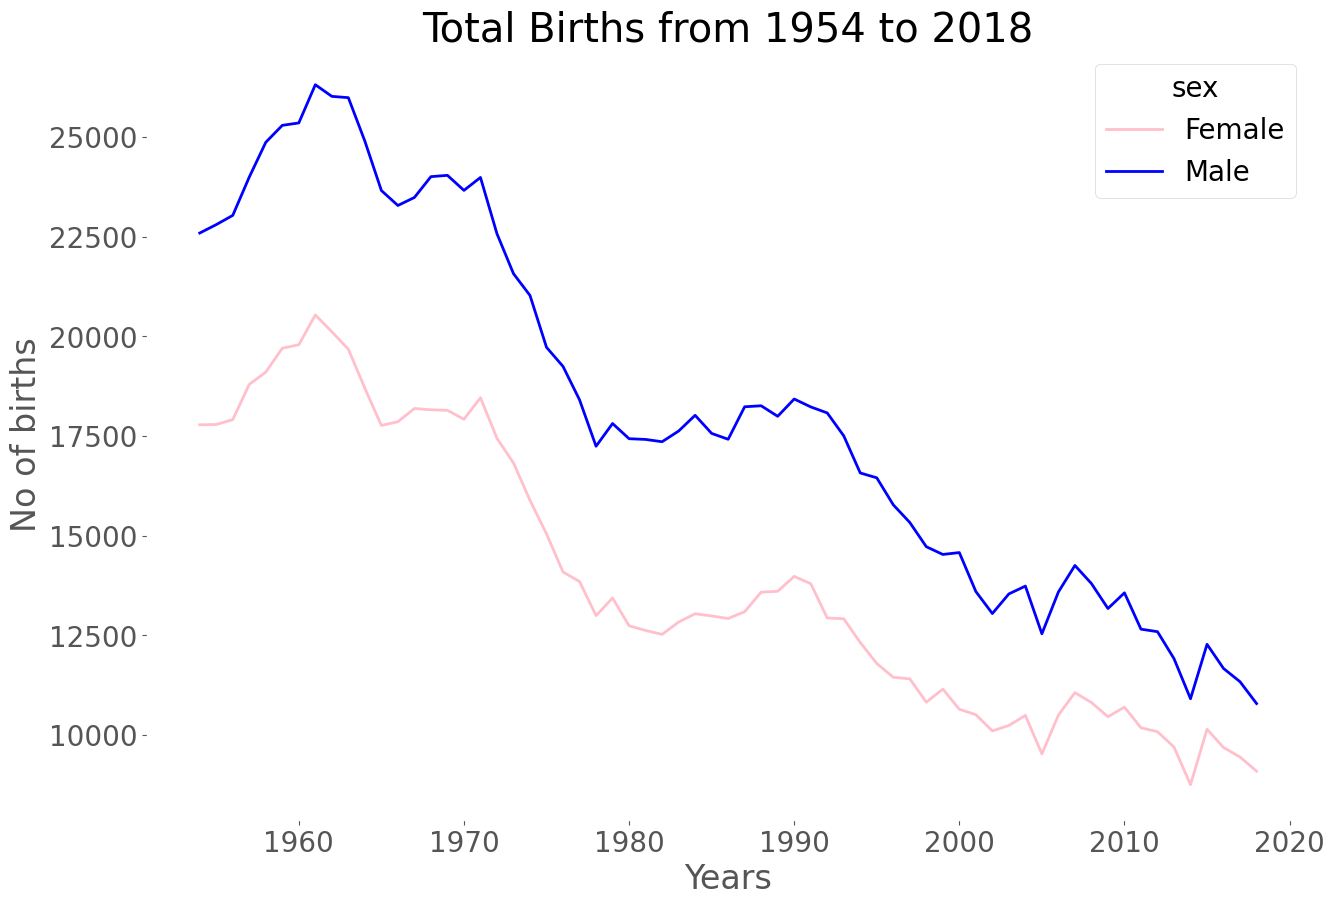

In [ ]:
births = birth.pivot_table('No.',index='year', columns='sex', aggfunc=sum) # to sum the over all birth in each year
births_plot=births.plot(title='Total Births from 1954 to 2018',lw=2,color=['pink','blue']) # createing plot of total birth
plt.ylabel("No of births")
plt.xlabel("Years")
plt.show()

### Birth time trends of "Christine"
The plot illustrates the birth time trends of "Christine". It follows some fluctuation around the 1950s. We can observe the last rise in the late 1950s after that fall around the 1960s. A number of births are recorded in the 1990s. The trend ended in the late 1990s.

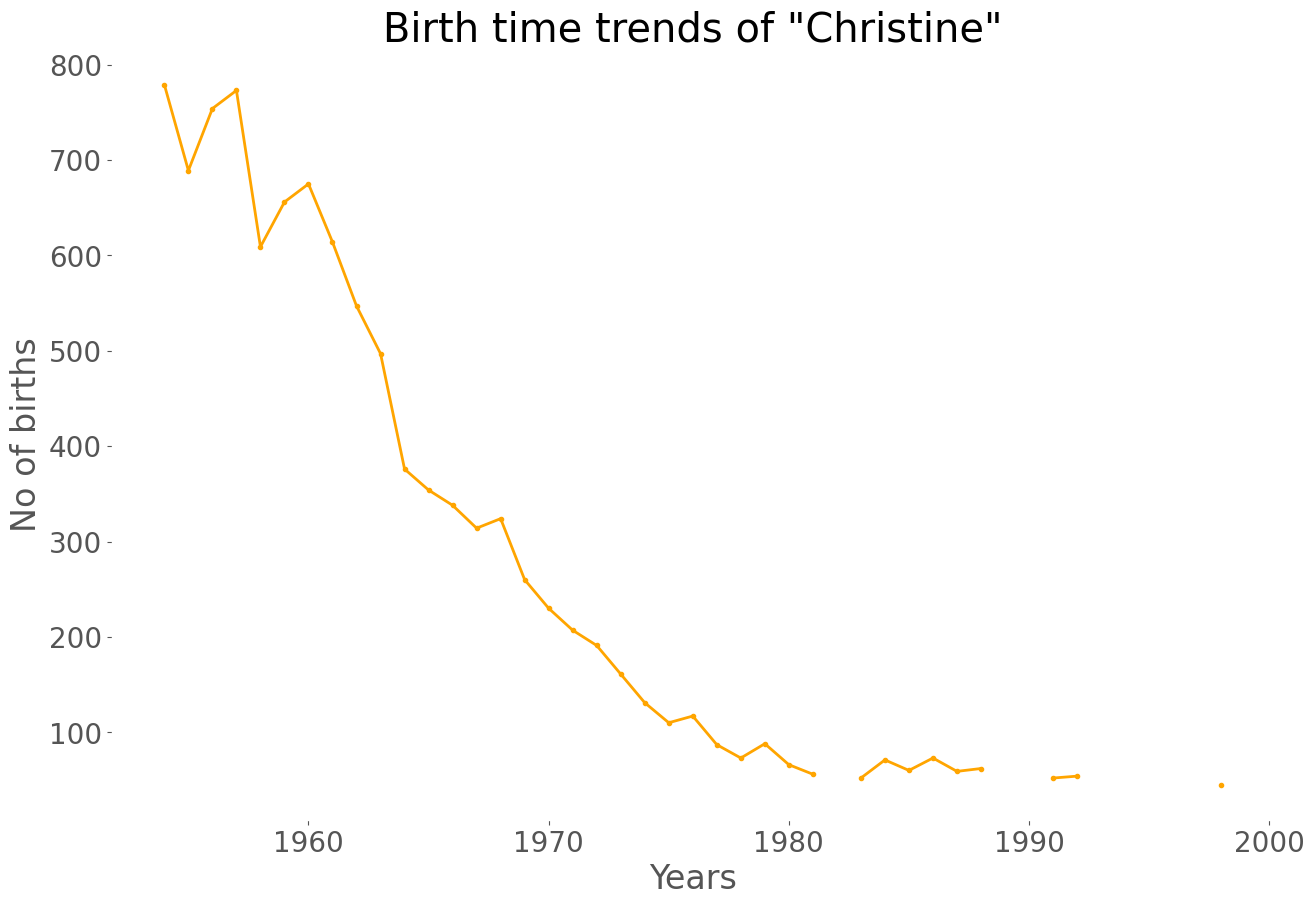

In [ ]:
total_births = birth.pivot_table('No.',index="year" ,columns='Name', aggfunc="mean") # find the mean values
total_births['Christine'].plot(title='Birth time trends of "Christine"',color='orange',style='.-',lw=2) # birth rate of christine
plt.ylabel("No of births")
plt.xlabel("Years")
plt.show()

## Top 3 trending names in 2018
The bar plots below is showing the top trending names in New Zealand in 2018. With the data prepared, I can then create the plot appropriately.

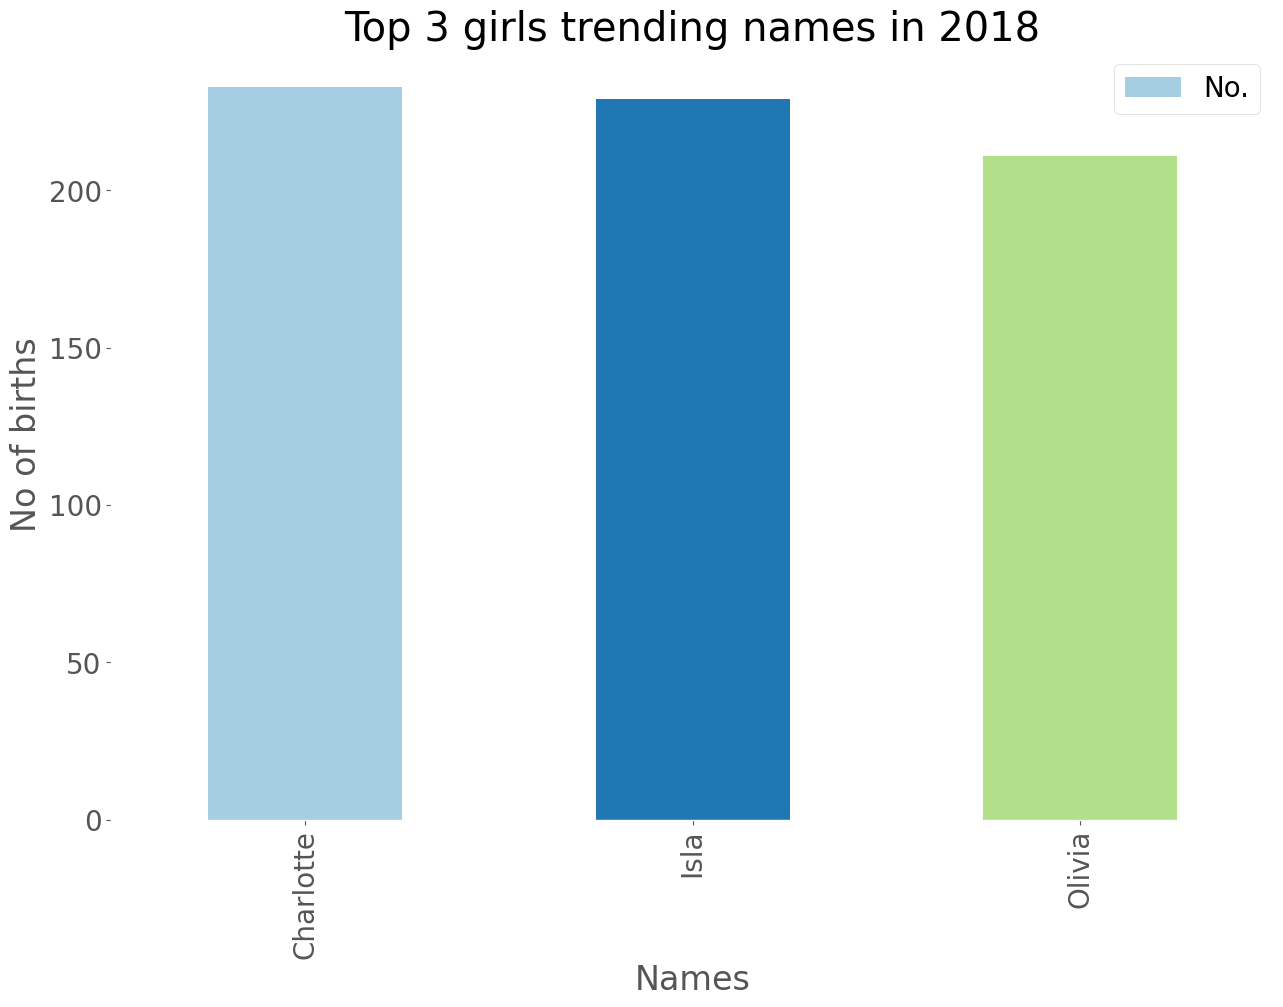

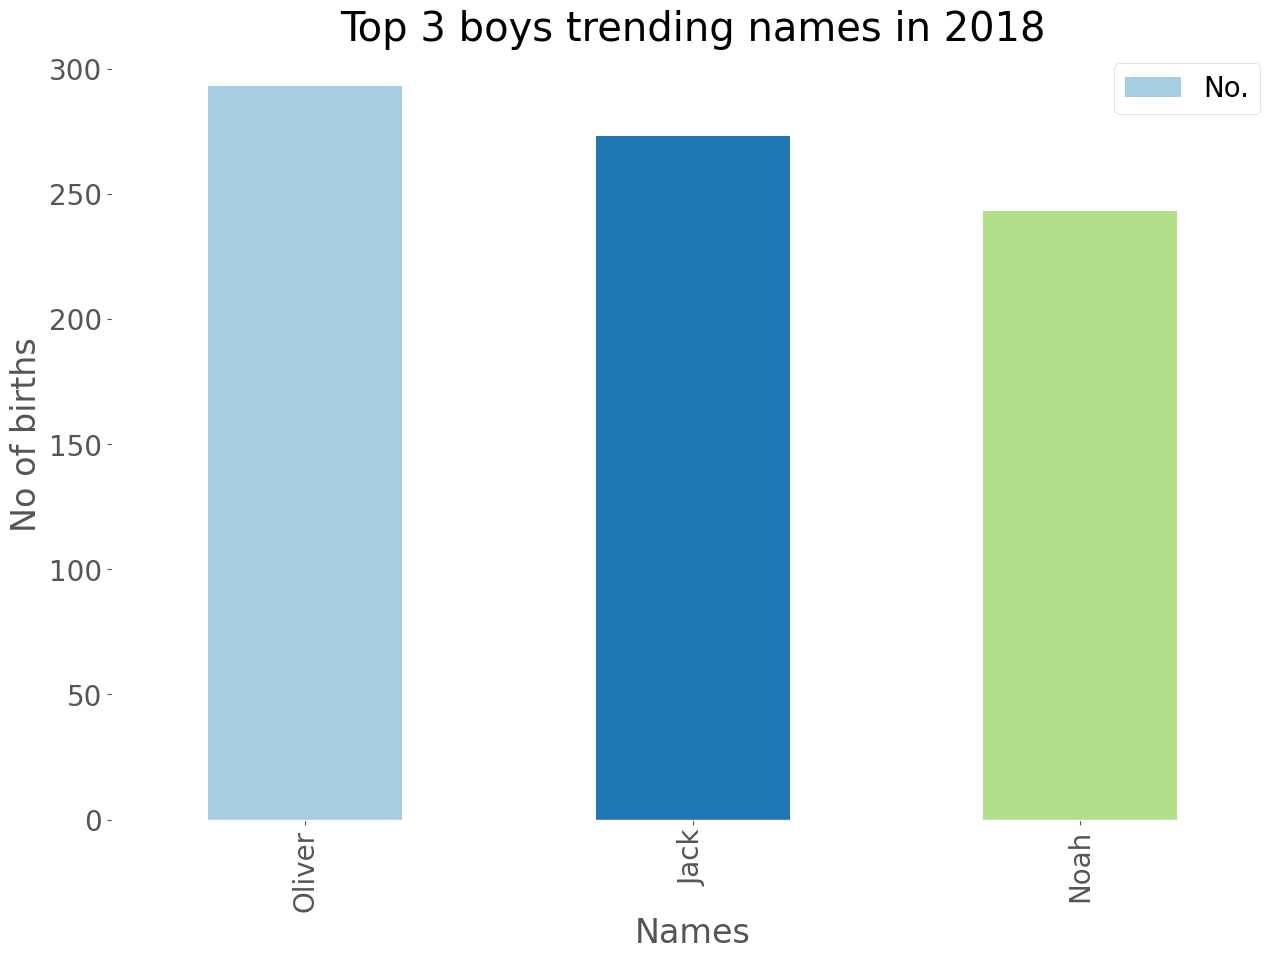

In [ ]:
birth1=birth.loc[birth[birth['year']==2018].groupby('sex')['No.'].nlargest(3).index.get_level_values(1)]
birth1[birth1['sex']=='Female'].plot(x='Name',y='No.',kind='bar',color=plt.cm.Paired(np.arange(len(birth1))))
plt.title("Top 3 girls trending names in 2018")
plt.ylabel("No of births")
plt.xlabel("Names")
plt.show()


birth1[birth1['sex']=='Male'].plot(x='Name',y='No.',kind='bar',color=plt.cm.Paired(np.arange(len(birth1))))
plt.title("Top 3 boys trending names in 2018")
plt.ylabel("No of births")
plt.xlabel("Names")
plt.show()

### Mean values of male and female
Figure show the mean values of feamle and male.

Text(0.5, 0, 'Sex')

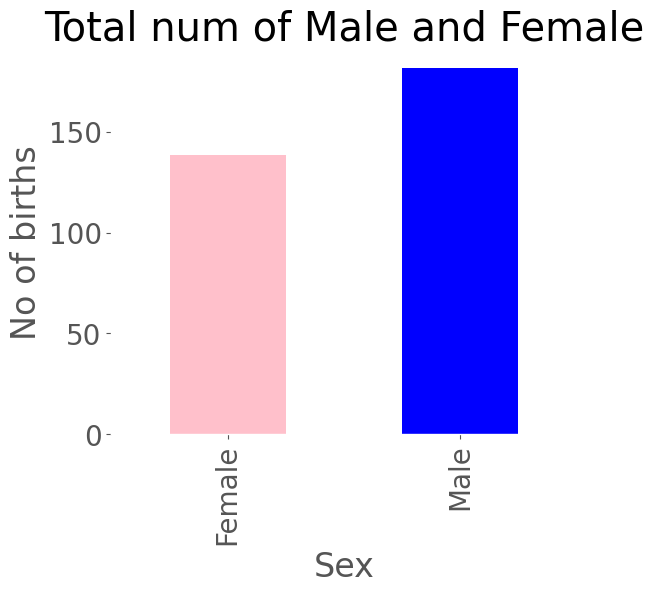

In [ ]:
dfg=birth.groupby(['sex'])['No.'].mean()
dfg.plot( kind="bar",title='Total num of Male and Female',color=['pink', 'blue'],figsize=(6, 5))
plt.ylabel("No of births")
plt.xlabel("Sex")

## Data cleaning and wrangling

### Result is the same as the data in ‘baby_names.csv’
The dataset, sourced from the URL https://smartstart.services.govt.nz/assets/files/Top-100-girls-and-boys-names-since-1954.xlsx, was imported directly for analysis. This dataset presented challenges due to the presence of numerous NaN values and unclean data. Consequently, efforts were undertaken to clean and transform the data into a suitable format for further analysis. The dataset was provided in xlsx format.

### Data Cleaning Steps:

The data cleaning process involved the following steps:

- Data was read with headers extracted from rows 4 and 5.
- Rows and columns containing more than four NaN values were removed.
- Column names were renamed to match the desired format.
- Data was reshaped and wrangled into a more appropriate structure.
- A gender column was introduced, addressing the omission in the initial dataset.
- To align with the CSV file, data was filtered to include records up to the year 2018.

In [ ]:
import pandas as pd
# function is used to read excel
def baby_names_list(sheet_name,sex):
    url="https://smartstart.services.govt.nz/assets/files/Top-100-girls-and-boys-names-since-1954.xlsx"
    df=pd.read_excel(url,header=[4,5],sheet_name=sheet_name) # import data of the specific sheet
    df.dropna(thresh=4,axis=1,inplace=True) # drop all the NaN value from cols
    df.dropna(thresh=4,axis=0,inplace=True) # drop all the NaN value from rows
    df.rename(columns={'Name.1':'Name'},level=1,inplace=True) # rename column label 'Name.1' to 'Name
    df.drop(labels="Rank",axis=1,inplace=True,level=0) # drop Rank column
    df=df.unstack().unstack(level=1).reset_index(level=1,drop=True).rename_axis('Year').reset_index() # unstack the dataframe until get the desired output
    df['No.'].fillna(df['No'],inplace=True) # merge column values
    df.drop(labels='No',axis=1,inplace=True) # drop extra col
    df["Sex"]=sex # adding column to specify gender
    df=df[df["Year"]<2019] # current data is from 1954 to 2021 but the provided csv has only data till 2018 so, extracting data untill 2018
    return df

In the imported file, there are two sheets: one for the girls and the other for the boys. We have imported them separately by calling the function built in the above cell, and the results are stored in separate dataframes.



In [ ]:
baby_boys=baby_names_list("Boys' Names","Male") # getting Boys dataframe
baby_girls=baby_names_list("Girls' Names","Female") # getting Girls dataframe

To obtain a single dataframe, we utilized the 'concat' function to combine both dataframes. For a more organized representation, we need to create a user-defined function to handle the concatenation.


In [ ]:
# function is used to concat both Dataframe to make a single Dataframe
def func_concat(df_girls,df_boys):
    frames=[df_girls,df_boys]
    baby_names=pd.concat(frames)
    return baby_names
baby_names=func_concat(baby_girls,baby_boys)

We will take the view of the dataset to see if the final results are the same as our need.

In [ ]:
# the final output
baby_names.head(20)

,Year,Name,No.,Sex
0,1954,Christine,779.0,Female
1,1954,Susan,735.0,Female
2,1954,Margaret,562.0,Female
3,1954,Judith,531.0,Female
4,1954,Jennifer,460.0,Female
5,1954,Mary,423.0,Female
6,1954,Elizabeth,419.0,Female
7,1954,Patricia,408.0,Female
8,1954,Linda,394.0,Female
9,1954,Barbara,382.0,Female


In [ ]:
# the final output
baby_names.tail(20)

,Year,Name,No.,Sex
6480,2018,Nixon,59.0,Male
6481,2018,Beauden,59.0,Male
6482,2018,Matthew,57.0,Male
6483,2018,Angus,57.0,Male
6484,2018,Wyatt,56.0,Male
6485,2018,Louie,56.0,Male
6486,2018,Roman,55.0,Male
6487,2018,Luka,55.0,Male
6488,2018,Ashton,55.0,Male
6489,2018,Zachary,54.0,Male


In [ ]:
baby_names.head(10)

,Year,Name,No.,Sex
0,1954,Christine,779.0,Female
1,1954,Susan,735.0,Female
2,1954,Margaret,562.0,Female
3,1954,Judith,531.0,Female
4,1954,Jennifer,460.0,Female
5,1954,Mary,423.0,Female
6,1954,Elizabeth,419.0,Female
7,1954,Patricia,408.0,Female
8,1954,Linda,394.0,Female
9,1954,Barbara,382.0,Female


In [ ]:
baby_names.tail(10)

,Year,Name,No.,Sex
6490,2018,Phoenix,54.0,Male
6491,2018,Kingston,54.0,Male
6492,2018,Harley,54.0,Male
6493,2018,Adam,54.0,Male
6494,2018,Fletcher,53.0,Male
6495,2018,Alex,52.0,Male
6496,2018,Kayden,51.0,Male
6497,2018,Grayson,50.0,Male
6498,2018,David,50.0,Male
6499,2018,Patrick,49.0,Male


### Unique years
We will check the data for the unique years. In the results, we can see that the data ranges from 1954 to 2018.

In [ ]:
baby_names.Year.unique()

array([1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

### Unique Gender

In [ ]:
baby_names.Sex.unique()

array(['Female', 'Male'], dtype=object)

### Total Record

The length of the data is 13,000, which has been collected through a survey in New Zealand.

In [ ]:
len(baby_names)

13000

## Conclusion

This report has aimed to address several questions that may offer insights into the trends in baby names in New Zealand. In the analysis, it was found that the total birth rate of girls and boys from 1954 to 2018 exhibited specific trends.


Additionally, this report determined that the name "Christine" experienced a surge in popularity during its early years but then began to decline.


We also identified the top 3 trending names in 2018. The top names for boys were Oliver, Jack, and Noah, while the top trending names for girls were Isla, Olivia, and Charlotte. In summary, this report illustrates the trends in baby names in New Zealand.